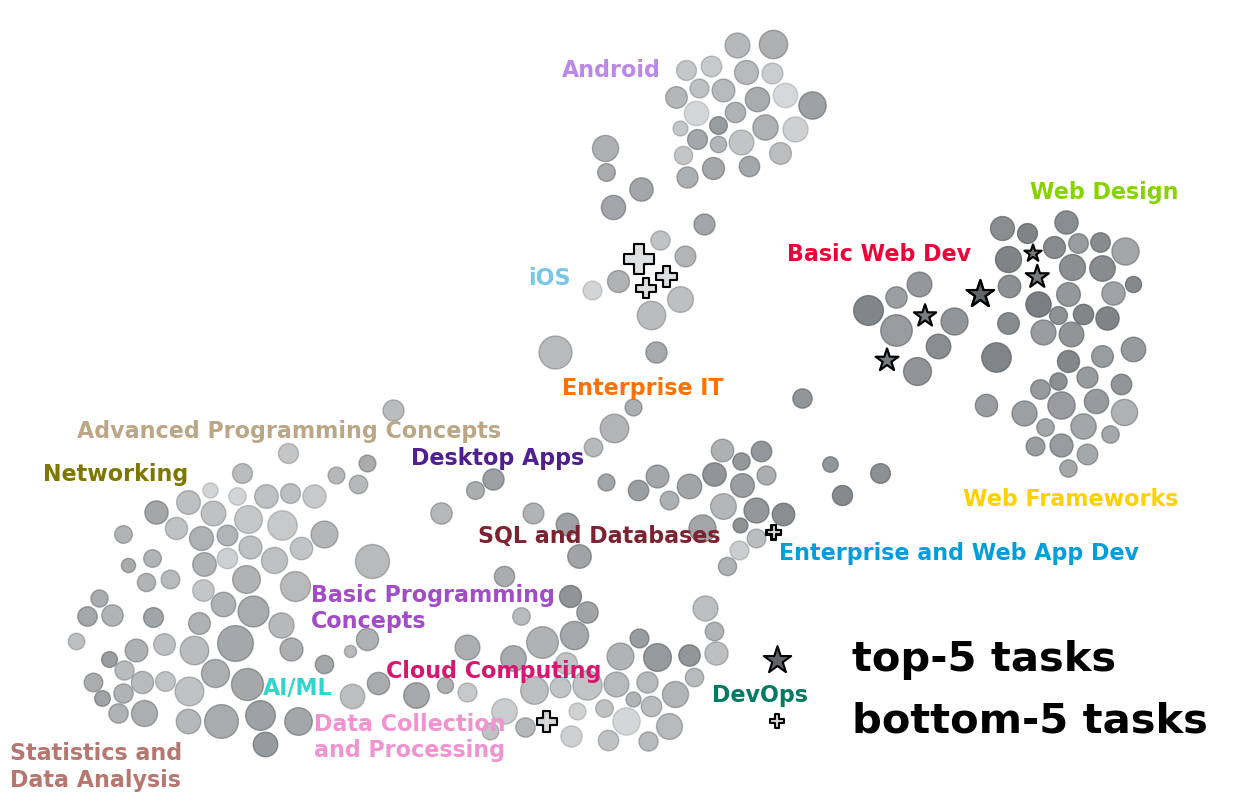

In [7]:
from pickle_file import load_obj
from collections import defaultdict
import numpy as np

data_path = 'data_processing/data_files/task_space_data/'
data_path_save = data_path + 'obj_tag_question_bipartite_core_space/'

df_task_space = load_obj('umapdf_DBSCAN2_level1_user_count', data_path_save + 'task_space_draw/')
df_cluster_adjusted = load_obj('cluster_conclusion_adjusted', data_path_save + 'task_space_draw/')

level = 1

programming_language_std_adjusted = load_obj('programming_language_std_adjusted', data_path_save)
L_dict = {l:i for i,l in enumerate(programming_language_std_adjusted)}
community_list_core_std = load_obj(f"community_list_std_core_cut_level{level}", data_path_save + 'networks/probability/')
C_dict = {c:i for i,c in enumerate(community_list_core_std)}
community_core_level = load_obj(f"community_core_with_cut_level{level}", data_path_save + 'networks/probability/')

tag_community_dict = {}
for i,c in community_core_level.items():
    for t in c:
        tag_community_dict[t] = i


import matplotlib.pyplot as plt

import pandas as pd

df_value_dict_temp = load_obj('df_task_value_2023', data_path_save + 'surveys/country/hn_job_task_salary_only_us_log/')
df_value_dict = {t:v for t,v in df_value_dict_temp.items() if v > 0.1}
task_value_sorted = sorted(df_value_dict.items(), key = lambda kv:(-kv[1], kv[0]))

low_value_task = [t[0] for t in task_value_sorted[:5]]
high_value_task = [t[0] for t in task_value_sorted[-5:]]

task_user_set_all = defaultdict(set)
for yr in range(2008, 2024):
    task_user_set = load_obj(f'task_user_set_{yr}_level_{level}', data_path_save + 'vote_regression_together/user_c_l_list/')
    for u, tsl in task_user_set.items():
        for t in tsl:
            task_user_set_all[t].add(u)

task_user_count = {t:len(ul) for t, ul in task_user_set_all.items()}
task_size_list = [np.sqrt(task_user_count[t[10:]]) * 1.2 for t in df_task_space.occ_code]

fig = plt.figure(figsize=(15,10))


original_list = [df_value_dict[t[10:]] for t in df_task_space.occ_code]
tuned_min = 1
tuned_max = 0.2

a_linear = (tuned_max - tuned_min) /(max(original_list) - min(original_list))
b_linear = tuned_max - a_linear * max(original_list)
adjust_list = [a_linear * s + b_linear for s in original_list]

for x,y,s,a,t in zip(df_task_space.adjusted_x, df_task_space.adjusted_y, task_size_list, adjust_list, df_task_space.occ_code):
    if t[10:] not in high_value_task and t[10:] not in low_value_task:  
        plt.scatter(x, y, s = s, c = '#616569', alpha = a)

for x,y,s,a,t in zip(df_task_space.adjusted_x, df_task_space.adjusted_y, task_size_list, adjust_list, df_task_space.occ_code):
    if t[10:] in high_value_task[:4]:  
        plt.scatter(x, y, s = s,marker = '*', c = '#616569', alpha = a)
        plt.scatter(x, y, s=s,marker='*',c = 'none', edgecolors = 'k', linewidths=1.5)

for x,y,s,a,t in zip(df_task_space.adjusted_x, df_task_space.adjusted_y, task_size_list, adjust_list, df_task_space.occ_code):
    if t[10:] in low_value_task[:4]:  
        plt.scatter(x, y, s = s,marker='P', c = '#616569', alpha = a)
        plt.scatter(x, y, s=s,marker='P',c = 'none', edgecolors = 'k', linewidths=1.5)

for x,y,s,a,t in zip(df_task_space.adjusted_x, df_task_space.adjusted_y, task_size_list, adjust_list, df_task_space.occ_code):
    if t[10:] in high_value_task[4:]:  
        plt.scatter(x, y, s = s,marker = '*', c = '#616569', alpha = a, edgecolors = 'k', linewidths=1.5, label = 'top-5 tasks')
        plt.scatter(x, y, s=s,marker='*',c = 'none', edgecolors = 'k', linewidths=1.5)

for x,y,s,a,t in zip(df_task_space.adjusted_x, df_task_space.adjusted_y, task_size_list, adjust_list, df_task_space.occ_code):
    if t[10:] in low_value_task[4:]:  
        plt.scatter(x, y, s = s,marker='P',facecolor=(97/255,101/255,105/255,a), edgecolors = (0,0,0,1), linewidths=1.5, label = 'bottom-5 tasks')
        plt.scatter(x, y, s=s,marker='P',c = 'none', edgecolors = 'k', linewidths=1.5)

#plt.scatter(x = df_task_space.adjusted_x, y = df_task_space.adjusted_y, s=adjust_list,c = 'none', edgecolors=[df_task_space.node_color[i] for i in df_task_space.index], linewidths=0.5)
#plt.scatter(x = df_task_space.adjusted_x, y = df_task_space.adjusted_y, s=task_size_list,c = 'none', edgecolors = df_task_space.node_color, linewidths=1.5)

for x, y, t,c in zip(df_cluster_adjusted.x, df_cluster_adjusted.y,df_cluster_adjusted.description, df_cluster_adjusted.color):
    plt.text(x,y,t, fontdict={'weight':'bold','size':16, 'c':c})
    #plt.text(x,y,t)

#plt.text(0,6,f'{tlp[0]} ~ {tlp[-1]}', fontdict={'family':'sans-serif','weight' : 'bold','size'   : 23,})

ax=plt.gca();#获得坐标轴的句柄
ax.spines['bottom'].set_linewidth(0);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(0);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(0);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(0);####设置上部坐标轴的粗细

plt.xticks([],[])
plt.yticks([],[])

font1 = {
        'weight' : 'bold',
        'size'   : 30,
}
legend = plt.legend(prop=font1, frameon = False, bbox_to_anchor=(0.58, 0.23))


#plt.savefig('output/figure_3d_task_value_space_top_bottom.png', format = 'png', transparent = True)


plt.show()

